seaborn website: https://seaborn.pydata.org/

# 散点图

<AxesSubplot:xlabel='x1', ylabel='y1'>

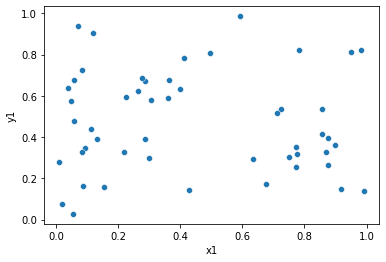

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


sample = pd.DataFrame(np.random.random(200).reshape(50, 4), columns=['x1','y1','a1','b1'])
# xy参数设置
sns.scatterplot(x=sample['x1'],y=sample['y1'])

<AxesSubplot:xlabel='a1', ylabel='x1'>

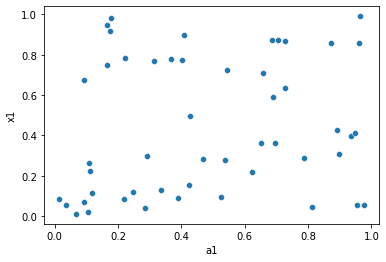

In [2]:
sns.scatterplot(data=sample,x='a1',y='x1')

## 全局样式设置：set(style='')

<AxesSubplot:xlabel='a1', ylabel='x1'>

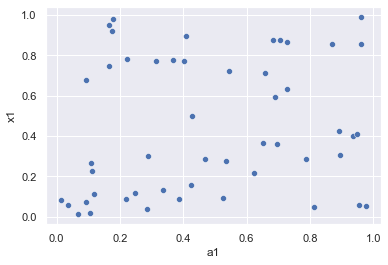

In [4]:
# 全局样式的设置
sns.set(style='darkgrid') # darkgrid
sns.scatterplot(data=sample, x='a1', y='x1')

## 另外一个数据集画散点图

In [6]:
names = sns.get_dataset_names()
names, len(names)

(['anagrams',
  'anscombe',
  'attention',
  'brain_networks',
  'car_crashes',
  'diamonds',
  'dots',
  'dowjones',
  'exercise',
  'flights',
  'fmri',
  'geyser',
  'glue',
  'healthexp',
  'iris',
  'mpg',
  'penguins',
  'planets',
  'seaice',
  'taxis',
  'tips',
  'titanic'],
 22)

<AxesSubplot:xlabel='fare', ylabel='age'>

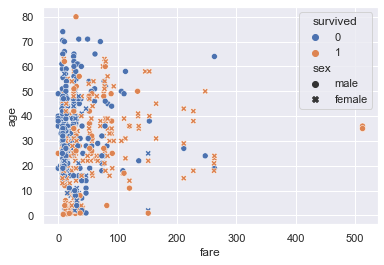

In [7]:
sample = sns.load_dataset('titanic')
# 可视化：散点图 -> 添加类别数据 -> 添加分类标识
sns.scatterplot(data=sample, x='fare', y='age', hue='survived', style='sex')

# 关系图

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 导入指数数据（https://coding.imooc.com/class/494.html）
sample = pd.read_csv('index_close_price.csv', index_col='date')
# 16上证50 905中证500 300沪深300 399673创业板50
sample.describe()

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
count,1610.000000,1610.000000,1610.000000,1610.000000
mean,2737.959196,6086.810399,3894.446236,1921.085168
std,442.309732,1040.888413,640.228529,621.963454
min,1912.720000,4018.460000,2853.760000,970.750000
25%,2381.245000,5410.005000,3397.155000,1477.625000
50%,2706.890000,6172.975000,3794.825000,1753.125000
75%,2978.682500,6496.497500,4111.780000,2351.165000
max,4028.530000,11545.890000,5807.720000,3871.400000


<AxesSubplot:xlabel='date'>

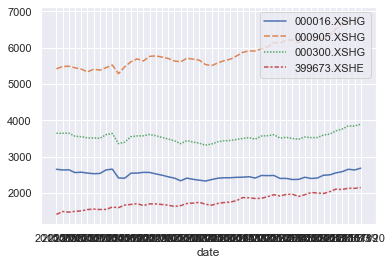

In [3]:
## 部分数据绘制：调整为月收盘价 -> 完整绘制 -> 数据解读（可能的偏差）
### 设置默认样式
sns.set() 
sns.lineplot(data=sample[:50])

In [4]:
sample.head()

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015/1/5,2649.64,5417.02,3641.54,1405.92
2015/1/6,2629.40,5479.86,3641.06,1486.42
2015/1/7,2635.23,5488.24,3643.79,1468.71
2015/1/8,2558.11,5444.04,3559.26,1490.81
2015/1/9,2569.02,5409.06,3546.72,1503.31


In [6]:
# 调整index为日期型
sample.index = pd.to_datetime(sample.index)
sample.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', name='date', length=1610, freq=None)

<AxesSubplot:xlabel='date'>

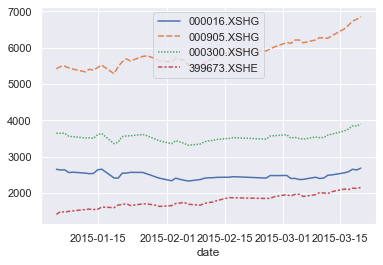

In [7]:
sns.lineplot(data=sample[:50])

In [8]:
### 调整时间频率：日 -> 月
bymonth = sample.resample('M').first()
bymonth

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-31,2649.64,5417.02,3641.54,1405.92
2015-02-28,2332.53,5609.39,3353.96,1648.01
2015-03-31,2479.24,6139.79,3601.26,1949.56
2015-04-30,2799.45,7425.73,4123.90,2315.51
2015-05-31,3272.01,8510.48,4787.74,2812.99
...,...,...,...,...
2021-04-30,3582.65,6311.66,5110.78,2725.48
2021-05-31,3449.94,6489.35,5061.12,2971.65
2021-06-30,3650.90,6739.76,5341.68,3286.86


<AxesSubplot:xlabel='date'>

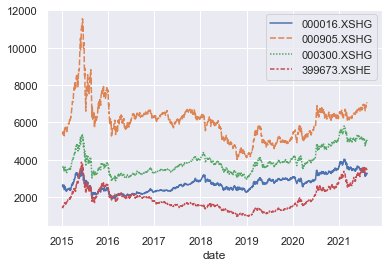

In [11]:
sns.lineplot(data=sample) # 绘制月度收盘价趋势线

In [12]:
### 计算、绘制涨跌幅

In [14]:
bymonth.shift(1)

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-31,NaN,NaN,NaN,NaN
2015-02-28,2649.64,5417.02,3641.54,1405.92
2015-03-31,2332.53,5609.39,3353.96,1648.01
2015-04-30,2479.24,6139.79,3601.26,1949.56
2015-05-31,2799.45,7425.73,4123.90,2315.51
...,...,...,...,...
2021-04-30,3787.87,6488.44,5418.78,2931.09
2021-05-31,3582.65,6311.66,5110.78,2725.48
2021-06-30,3449.94,6489.35,5061.12,2971.65


In [15]:
# 收益率/涨跌幅 = (期末值 - 期初值) / 期初值
# bymonth.shift(1)
byrate = (bymonth - bymonth.shift(1)) / bymonth.shift(1)
byrate

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-31,NaN,NaN,NaN,NaN
2015-02-28,-0.119680,0.035512,-0.078972,0.172193
2015-03-31,0.062897,0.094556,0.073734,0.182978
2015-04-30,0.129157,0.209444,0.145127,0.187709
2015-05-31,0.168805,0.146080,0.160974,0.214847
...,...,...,...,...
2021-04-30,-0.054178,-0.027245,-0.056839,-0.070148
2021-05-31,-0.037042,0.028153,-0.009717,0.090322
2021-06-30,0.058250,0.038588,0.055434,0.106072


In [16]:
# 方式2：更简单
byrate = bymonth.pct_change()
byrate

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-31,NaN,NaN,NaN,NaN
2015-02-28,-0.119680,0.035512,-0.078972,0.172193
2015-03-31,0.062897,0.094556,0.073734,0.182978
2015-04-30,0.129157,0.209444,0.145127,0.187709
2015-05-31,0.168805,0.146080,0.160974,0.214847
...,...,...,...,...
2021-04-30,-0.054178,-0.027245,-0.056839,-0.070148
2021-05-31,-0.037042,0.028153,-0.009717,0.090322
2021-06-30,0.058250,0.038588,0.055434,0.106072


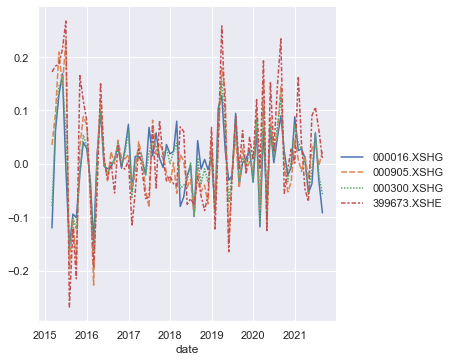

In [17]:
# 可视化涨跌幅（每月）
sns.relplot(data=byrate, kind='line')

In [18]:
## 统一基点：初始值为1000，收盘价 = 基点 * (1+涨跌幅) -> 数据理解
bases = byrate
bases.iloc[0] = 1000
bases.iloc[1:] = 1 + bases.iloc[1:]

bases = bases.cumprod()
bases

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-31,1000.000000,1000.000000,1000.000000,1000.000000
2015-02-28,880.319591,1035.512145,921.027917,1172.193297
2015-03-31,935.689377,1133.425758,988.938746,1386.679185
2015-04-30,1056.539756,1370.814581,1132.460443,1646.971378
2015-05-31,1234.888513,1571.063057,1314.756943,2000.817970
...,...,...,...,...
2021-04-30,1352.127081,1165.153535,1403.466665,1938.574030
2021-05-31,1302.041032,1197.955703,1389.829578,2113.669341
2021-06-30,1377.885298,1244.182226,1466.873905,2337.871287


<AxesSubplot:xlabel='date'>

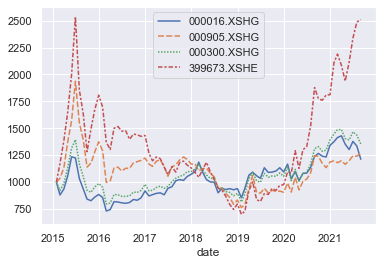

In [19]:
sns.lineplot(data=bases)

## 绘制流行歌曲的每日全球播放量折线图

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
spotify_data = pd.read_csv("spotify.csv", index_col="Date")
spotify_data.index = pd.to_datetime(spotify_data.index)
# spotify_data = spotify_data.fillna(0)

In [3]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


In [4]:
spotify_data.dtypes

Shape of You                  int64
Despacito                   float64
Something Just Like This    float64
HUMBLE.                     float64
Unforgettable               float64
dtype: object

Text(0.5, 1.0, 'Daily Global Streams of Popular Songs in 2017-2018')

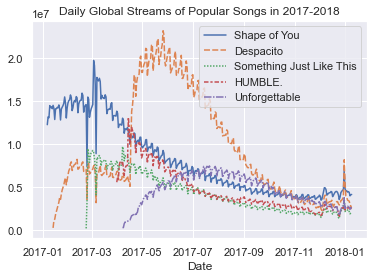

In [5]:
sns.set() # 设置默认样式
sns.lineplot(data=spotify_data).set_title("Daily Global Streams of Popular Songs in 2017-2018")

# 分布图

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 数据准备

sample = pd.read_csv('index_close_price.csv', index_col='date') # 导入数据
sample.index = pd.to_datetime(sample.index) # 调整index类型
bymonth = sample.resample('M').first() # 月收盘价
byrate = bymonth.pct_change() # 月涨跌幅

In [3]:
# 整体表现：日涨跌幅、月涨跌幅
dayrate = sample.pct_change()
dayrate

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE
date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,-0.007639,0.011600,-0.000132,0.057258
2015-01-07,0.002217,0.001529,0.000750,-0.011915
2015-01-08,-0.029265,-0.008054,-0.023198,0.015047
2015-01-09,0.004265,-0.006425,-0.003523,0.008385
...,...,...,...,...
2021-08-05,-0.001775,-0.002815,-0.006062,-0.008387
2021-08-06,-0.009810,0.003912,-0.005478,-0.011108
2021-08-09,0.012363,0.005860,0.013004,-0.015764


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

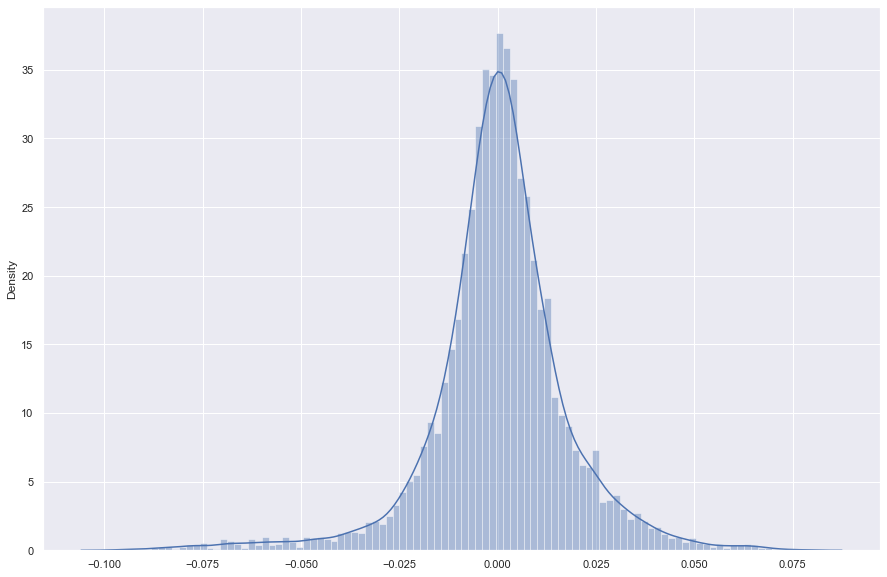

In [4]:
# 设置样式
sns.set()
# 设置一下画布大小
plt.figure(figsize=(15,10))
# 调用分布图
sns.distplot(dayrate,bins=100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

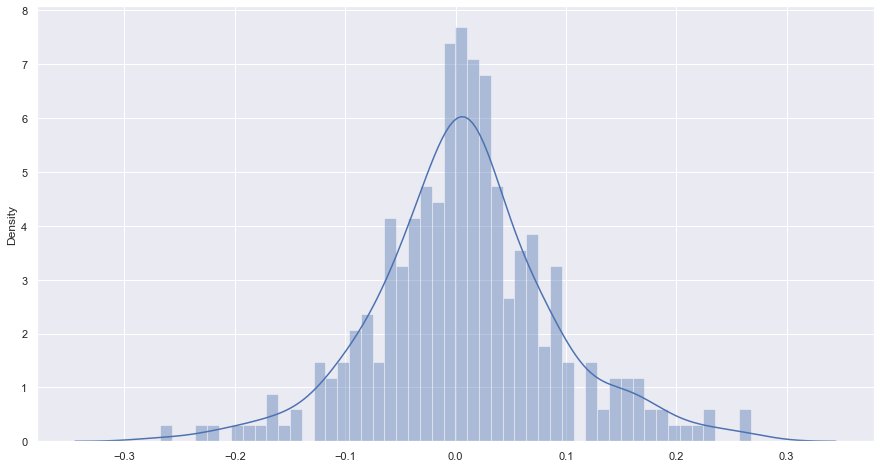

In [5]:
# 月涨跌幅
plt.figure(figsize=(15,8))
# 调用分布图
sns.distplot(byrate,bins=50)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0, 0.5, 'count')

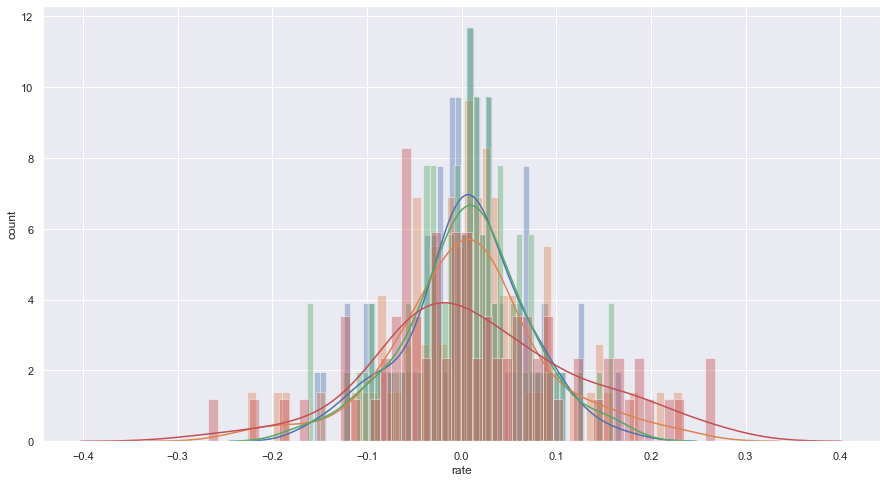

In [6]:
## 不同指数的月涨跌幅表现
plt.figure(figsize=(15,8))
indexs = byrate.columns.tolist()
for i in indexs:
    sns.distplot(byrate[i],bins=50)
plt.xlabel('rate')
plt.ylabel('count')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0, 0.5, 'count')

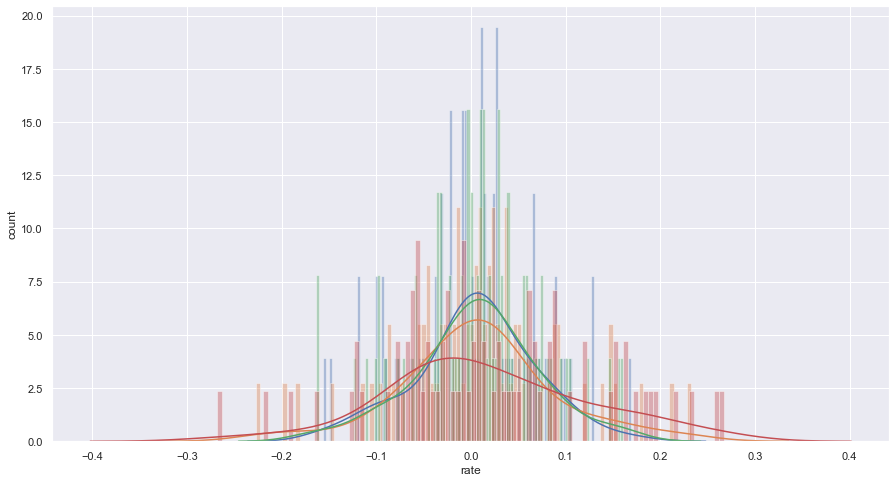

In [7]:
plt.figure(figsize=(15,8))
indexs = byrate.columns.tolist()
for i in indexs:
    sns.distplot(byrate[i],bins=100)
plt.xlabel('rate')
plt.ylabel('count')

# 类别图-历年收益率比较

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 数据准备

sample = pd.read_csv('index_close_price.csv', index_col='date') # 导入数据
sample.index = pd.to_datetime(sample.index) # 调整index类型

bymonth = sample.resample('M').first() # 月收盘价
monthrate = bymonth.pct_change() # 月涨跌幅
dayrate = sample.pct_change() # 日涨跌幅

cols = sample.columns.tolist() # 获取列标签

(-0.05, 0.05)

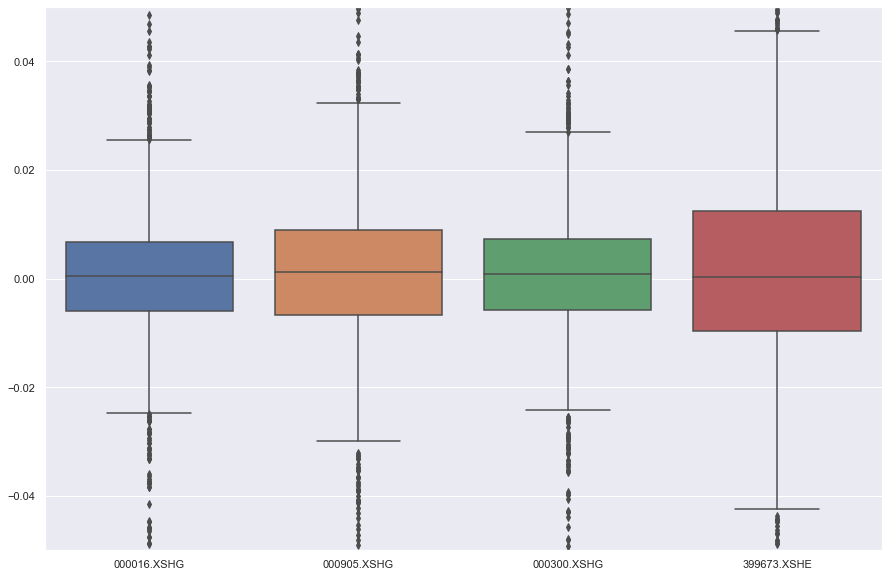

In [4]:
# 箱型图：日涨跌幅、月涨跌幅
sns.set()
plt.figure(figsize=(15,10))
sns.boxplot(data=dayrate)
plt.ylim(-0.050,0.050)

<AxesSubplot:>

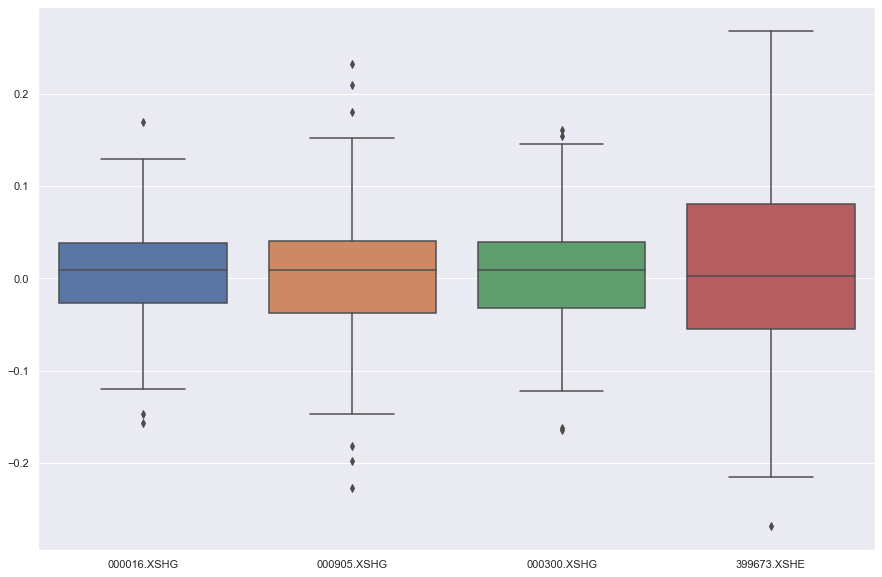

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(data=monthrate)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(-0.05, 0.05)

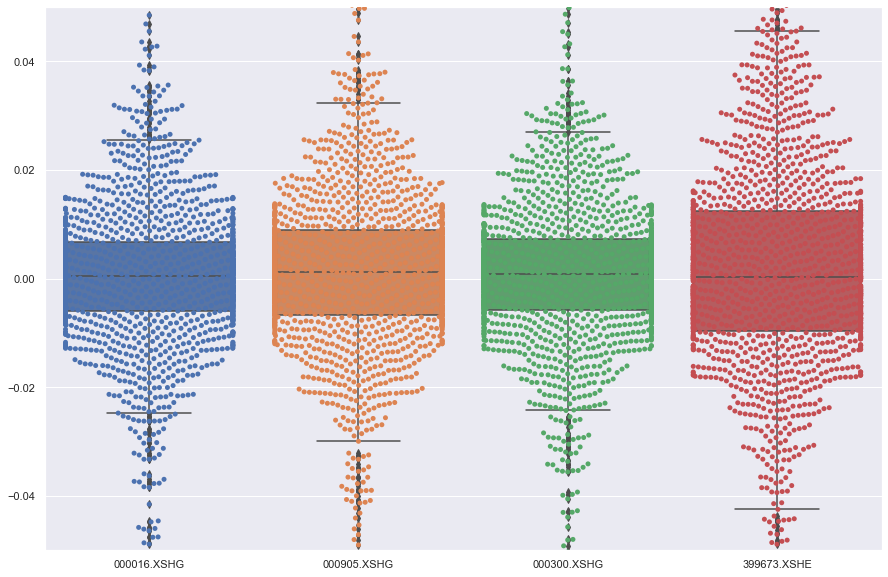

In [7]:
## 加入数据散点（非重叠）
plt.figure(figsize=(15,10))
sns.boxplot(data=dayrate)
sns.swarmplot(data=dayrate)
plt.ylim(-0.050,0.050)

(-0.05, 0.05)

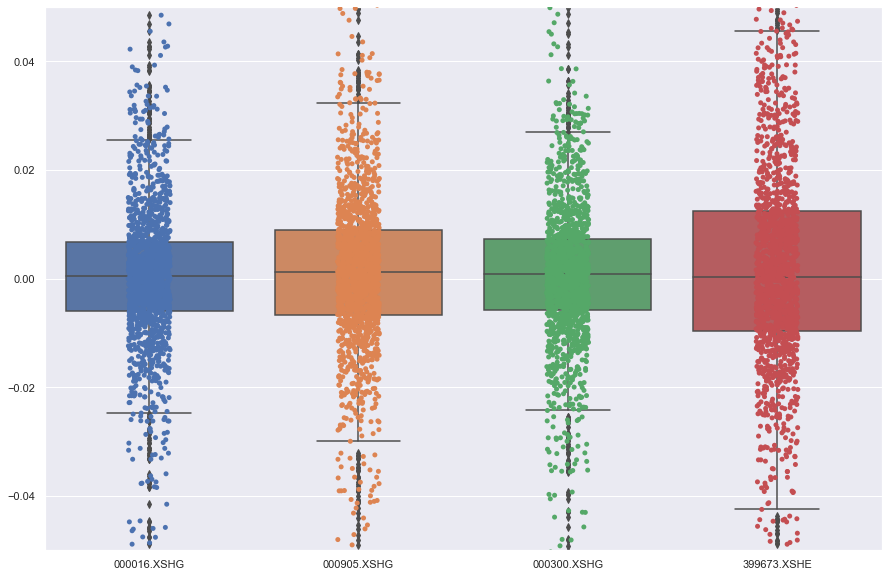

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dayrate)
sns.stripplot(data=dayrate)
plt.ylim(-0.050,0.050)

In [9]:
## 计算、可视化年收益率
byyear = sample.resample('Y').first()
yearrate = byyear.pct_change()

<AxesSubplot:>

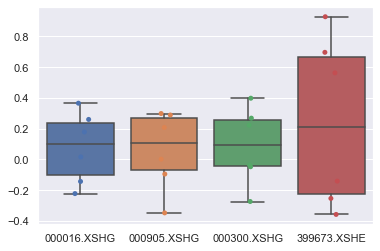

In [10]:
sns.boxplot(data=yearrate)
sns.stripplot(data=yearrate)

# 回归图-涨跌幅预测

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 数据准备

sample = pd.read_csv('index_close_price.csv', index_col='date') # 导入数据
sample.index = pd.to_datetime(sample.index) # 调整index类型

dayrate = sample.pct_change() # 日涨跌幅
bymonth = sample.resample('M').first() # 月收盘价
monthrate = bymonth.pct_change() # 月涨跌幅
byyear = sample.resample('Y').first() # 年收盘价
yearrate = byyear.pct_change() # 年涨跌幅

cols = sample.columns.tolist() # 获取列标签

In [4]:
# 回归图示例：账单金额vs消费金额、加入性别/烟民标签、加入日期标签
tips = sns.load_dataset("tips") 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


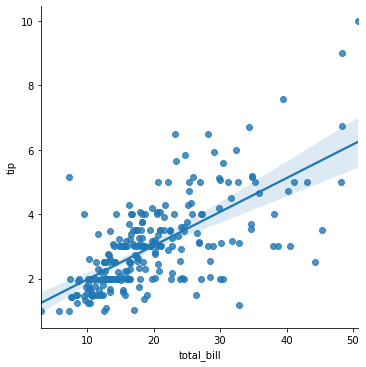

In [5]:
sns.lmplot(data=tips, x='total_bill', y='tip')

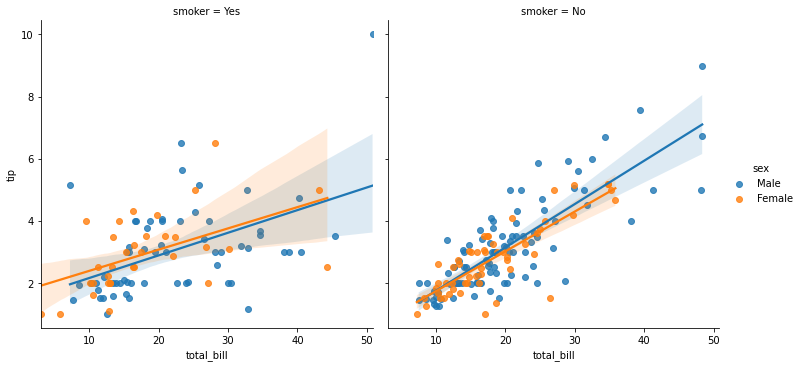

In [6]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='smoker')

In [7]:
## 回归图：月涨跌幅
monthrate['index'] = np.arange(len(monthrate))
monthrate

,000016.XSHG,000905.XSHG,000300.XSHG,399673.XSHE,index
date,,,,,
2015-01-31,NaN,NaN,NaN,NaN,0
2015-02-28,-0.119680,0.035512,-0.078972,0.172193,1
2015-03-31,0.062897,0.094556,0.073734,0.182978,2
2015-04-30,0.129157,0.209444,0.145127,0.187709,3
2015-05-31,0.168805,0.146080,0.160974,0.214847,4
...,...,...,...,...,...
2021-04-30,-0.054178,-0.027245,-0.056839,-0.070148,75
2021-05-31,-0.037042,0.028153,-0.009717,0.090322,76
2021-06-30,0.058250,0.038588,0.055434,0.106072,77


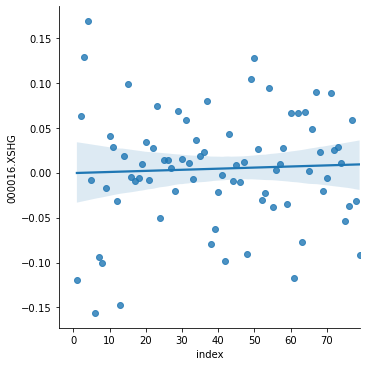

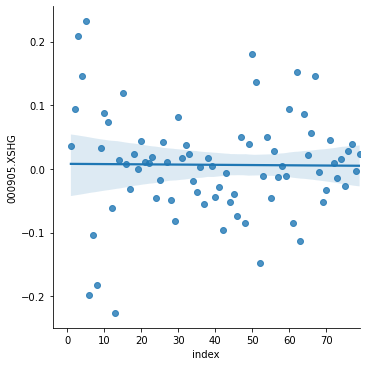

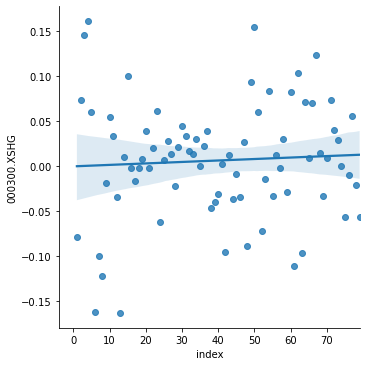

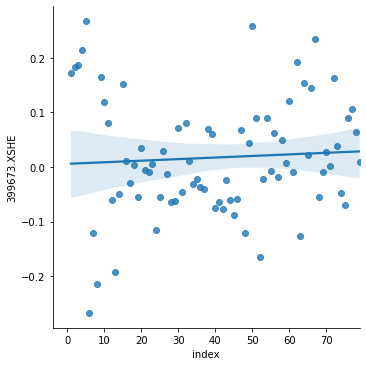

In [8]:
for c in cols:
    sns.lmplot(data=monthrate,x='index', y=c)

In [9]:
# 方式2：改变数据结构
temp = pd.DataFrame()
res = pd.DataFrame()

for c in cols:
    temp['rate'] = monthrate[c]
    temp['tag'] = c
    temp['index'] = np.arange(len(monthrate))
    res = res.append(temp)

res

,rate,tag,index
date,,,
2015-01-31,NaN,000016.XSHG,0
2015-02-28,-0.119680,000016.XSHG,1
2015-03-31,0.062897,000016.XSHG,2
2015-04-30,0.129157,000016.XSHG,3
2015-05-31,0.168805,000016.XSHG,4
...,...,...,...
2021-04-30,-0.070148,399673.XSHE,75
2021-05-31,0.090322,399673.XSHE,76
2021-06-30,0.106072,399673.XSHE,77


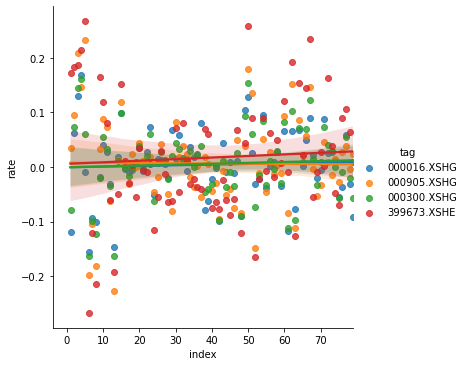

In [10]:
sns.lmplot(data=res,x='index', y='rate', hue='tag')

## 什么样的人群保险费用应该高一些？

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
healthy_data = pd.read_csv("healthy_data.csv")
healthy_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

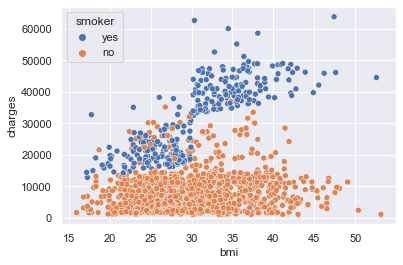

In [3]:
sns.set()
sns.scatterplot(data=healthy_data, x="bmi", y="charges", hue="smoker")

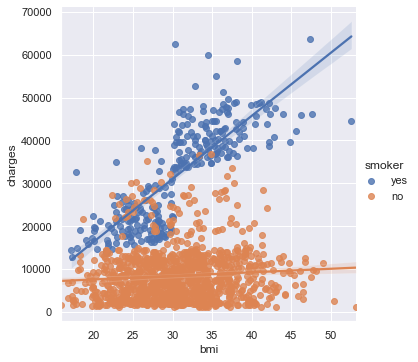

In [4]:
sns.lmplot(data=healthy_data, x="bmi", y="charges", hue="smoker")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

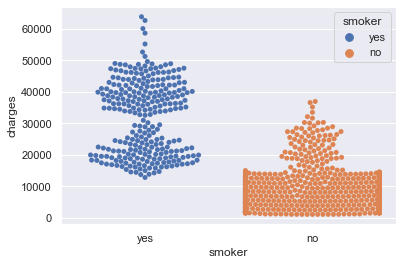

In [5]:
sns.swarmplot(data=healthy_data, x="smoker", y="charges", hue="smoker")

<AxesSubplot:xlabel='smoker', ylabel='charges'>

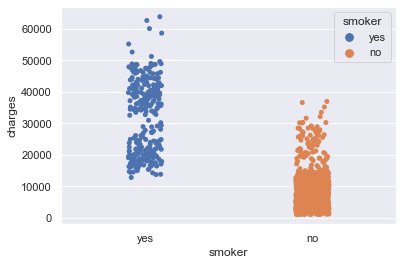

In [6]:
sns.stripplot(data=healthy_data, x="smoker", y="charges", hue="smoker")

从第一和第二幅图可知，对于吸引人群来说，体重指数和医疗费用呈正相关。而对于不吸烟的人群，这个趋势不是很明显。从第三幅图可知，不吸烟的人治疗费用更低些。

# 矩阵热力图-指数相关性

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 数据准备

sample = pd.read_csv('index_close_price.csv', index_col='date') # 导入数据
sample.index = pd.to_datetime(sample.index) # 调整index类型

dayrate = sample.pct_change() # 日涨跌幅
bymonth = sample.resample('M').first() # 月收盘价
monthrate = bymonth.pct_change() # 月涨跌幅
byyear = sample.resample('Y').first() # 年收盘价
yearrate = byyear.pct_change() # 年涨跌幅

cols = sample.columns.tolist() # 获取列标签

<AxesSubplot:>

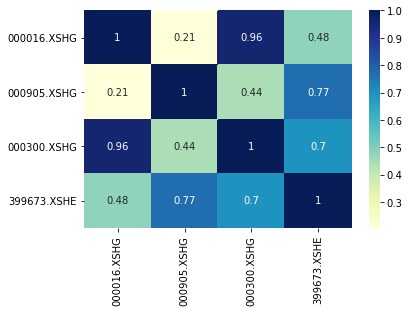

In [4]:
## 热力图：计算收盘价相关性
corrs = sample.corr()
sns.heatmap(corrs,annot=True,cmap="YlGnBu")

In [5]:
# 相关性分析：是否有重复持仓

SZ50 = ['600000.XSHG', '600009.XSHG', '600016.XSHG', '600028.XSHG', '600030.XSHG', '600031.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600104.XSHG', '600196.XSHG', '600276.XSHG', '600309.XSHG', '600438.XSHG', '600519.XSHG', '600547.XSHG', '600570.XSHG', '600585.XSHG', '600588.XSHG', '600690.XSHG', '600703.XSHG', '600745.XSHG', '600809.XSHG', '600837.XSHG', '600887.XSHG', '600893.XSHG', '600918.XSHG', '601012.XSHG', '601066.XSHG', '601088.XSHG', '601138.XSHG', '601166.XSHG', '601211.XSHG', '601288.XSHG', '601318.XSHG', '601336.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601818.XSHG', '601857.XSHG', '601888.XSHG', '601899.XSHG', '601995.XSHG', '603259.XSHG', '603288.XSHG', '603501.XSHG', '603986.XSHG']
ZZ500 = ['000009.XSHE', '000012.XSHE', '000021.XSHE', '000027.XSHE', '000028.XSHE', '000031.XSHE', '000039.XSHE', '000046.XSHE', '000050.XSHE', '000060.XSHE', '000061.XSHE', '000062.XSHE', '000078.XSHE', '000089.XSHE', '000090.XSHE', '000156.XSHE', '000158.XSHE', '000400.XSHE', '000401.XSHE', '000402.XSHE', '000415.XSHE', '000488.XSHE', '000501.XSHE', '000513.XSHE', '000519.XSHE', '000528.XSHE', '000537.XSHE', '000540.XSHE', '000547.XSHE', '000553.XSHE', '000559.XSHE', '000563.XSHE', '000581.XSHE', '000598.XSHE', '000623.XSHE', '000629.XSHE', '000630.XSHE', '000636.XSHE', '000671.XSHE', '000681.XSHE', '000685.XSHE', '000686.XSHE', '000690.XSHE', '000709.XSHE', '000717.XSHE', '000718.XSHE', '000723.XSHE', '000729.XSHE', '000732.XSHE', '000738.XSHE', '000739.XSHE', '000750.XSHE', '000758.XSHE', '000778.XSHE', '000799.XSHE', '000807.XSHE', '000813.XSHE', '000825.XSHE', '000826.XSHE', '000830.XSHE', '000869.XSHE', '000877.XSHE', '000878.XSHE', '000883.XSHE', '000887.XSHE', '000898.XSHE', '000930.XSHE', '000932.XSHE', '000937.XSHE', '000959.XSHE', '000960.XSHE', '000961.XSHE', '000967.XSHE', '000970.XSHE', '000975.XSHE', '000983.XSHE', '000988.XSHE', '000990.XSHE', '000997.XSHE', '000998.XSHE', '000999.XSHE', '001872.XSHE', '001914.XSHE', '002002.XSHE', '002004.XSHE', '002010.XSHE', '002013.XSHE', '002019.XSHE', '002028.XSHE', '002030.XSHE', '002038.XSHE', '002048.XSHE', '002056.XSHE', '002065.XSHE', '002074.XSHE', '002075.XSHE', '002078.XSHE', '002080.XSHE', '002081.XSHE', '002085.XSHE', '002092.XSHE', '002110.XSHE', '002124.XSHE', '002127.XSHE', '002128.XSHE', '002131.XSHE', '002138.XSHE', '002146.XSHE', '002152.XSHE', '002155.XSHE', '002156.XSHE', '002174.XSHE', '002180.XSHE', '002183.XSHE', '002185.XSHE', '002191.XSHE', '002195.XSHE', '002203.XSHE', '002212.XSHE', '002221.XSHE', '002223.XSHE', '002233.XSHE', '002242.XSHE', '002244.XSHE', '002249.XSHE', '002250.XSHE', '002266.XSHE', '002268.XSHE', '002273.XSHE', '002281.XSHE', '002294.XSHE', '002299.XSHE', '002302.XSHE', '002317.XSHE', '002340.XSHE', '002353.XSHE', '002368.XSHE', '002372.XSHE', '002373.XSHE', '002375.XSHE', '002382.XSHE', '002385.XSHE', '002387.XSHE', '002390.XSHE', '002396.XSHE', '002399.XSHE', '002408.XSHE', '002416.XSHE', '002419.XSHE', '002422.XSHE', '002423.XSHE', '002424.XSHE', '002429.XSHE', '002434.XSHE', '002439.XSHE', '002440.XSHE', '002444.XSHE', '002458.XSHE', '002465.XSHE', '002468.XSHE', '002500.XSHE', '002505.XSHE', '002506.XSHE', '002507.XSHE', '002511.XSHE', '002532.XSHE', '002557.XSHE', '002563.XSHE', '002572.XSHE', '002583.XSHE', '002595.XSHE', '002603.XSHE', '002625.XSHE', '002635.XSHE', '002648.XSHE', '002653.XSHE', '002670.XSHE', '002683.XSHE', '002690.XSHE', '002701.XSHE', '002705.XSHE', '002709.XSHE', '002745.XSHE', '002797.XSHE', '002815.XSHE', '002818.XSHE', '002831.XSHE', '002839.XSHE', '002867.XSHE', '002901.XSHE', '002925.XSHE', '002926.XSHE', '002936.XSHE', '002946.XSHE', '002948.XSHE', '002958.XSHE', '002966.XSHE', '002985.XSHE', '003022.XSHE', '003035.XSHE', '300001.XSHE', '300002.XSHE', '300009.XSHE', '300010.XSHE', '300017.XSHE', '300024.XSHE', '300026.XSHE', '300037.XSHE', '300058.XSHE', '300070.XSHE', '300072.XSHE', '300088.XSHE', '300113.XSHE', '300115.XSHE', '300133.XSHE', '300146.XSHE', '300166.XSHE', '300168.XSHE', '300180.XSHE', '300182.XSHE', '300207.XSHE', '300212.XSHE', '300223.XSHE', '300244.XSHE', '300251.XSHE', '300253.XSHE', '300257.XSHE', '300271.XSHE', '300285.XSHE', '300296.XSHE', '300308.XSHE', '300315.XSHE', '300316.XSHE', '300357.XSHE', '300376.XSHE', '300383.XSHE', '300418.XSHE', '300463.XSHE', '300474.XSHE', '300482.XSHE', '300618.XSHE', '300630.XSHE', '300699.XSHE', '300741.XSHE', '600006.XSHG', '600008.XSHG', '600021.XSHG', '600022.XSHG', '600026.XSHG', '600027.XSHG', '600037.XSHG', '600038.XSHG', '600039.XSHG', '600056.XSHG', '600060.XSHG', '600062.XSHG', '600064.XSHG', '600066.XSHG', '600068.XSHG', '600089.XSHG', '600094.XSHG', '600095.XSHG', '600120.XSHG', '600126.XSHG', '600131.XSHG', '600141.XSHG', '600153.XSHG', '600155.XSHG', '600158.XSHG', '600160.XSHG', '600166.XSHG', '600167.XSHG', '600170.XSHG', '600171.XSHG', '600177.XSHG', '600188.XSHG', '600195.XSHG', '600201.XSHG', '600208.XSHG', '600216.XSHG', '600219.XSHG', '600256.XSHG', '600258.XSHG', '600259.XSHG', '600260.XSHG', '600266.XSHG', '600271.XSHG', '600282.XSHG', '600307.XSHG', '600312.XSHG', '600315.XSHG', '600316.XSHG', '600325.XSHG', '600329.XSHG', '600339.XSHG', '600348.XSHG', '600350.XSHG', '600369.XSHG', '600372.XSHG', '600373.XSHG', '600376.XSHG', '600377.XSHG', '600380.XSHG', '600388.XSHG', '600390.XSHG', '600392.XSHG', '600398.XSHG', '600409.XSHG', '600410.XSHG', '600415.XSHG', '600418.XSHG', '600435.XSHG', '600446.XSHG', '600460.XSHG', '600466.XSHG', '600486.XSHG', '600487.XSHG', '600497.XSHG', '600498.XSHG', '600500.XSHG', '600507.XSHG', '600511.XSHG', '600516.XSHG', '600517.XSHG', '600528.XSHG', '600529.XSHG', '600535.XSHG', '600536.XSHG', '600546.XSHG', '600549.XSHG', '600556.XSHG', '600563.XSHG', '600566.XSHG', '600567.XSHG', '600572.XSHG', '600580.XSHG', '600582.XSHG', '600597.XSHG', '600598.XSHG', '600623.XSHG', '600633.XSHG', '600637.XSHG', '600639.XSHG', '600640.XSHG', '600642.XSHG', '600643.XSHG', '600645.XSHG', '600648.XSHG', '600649.XSHG', '600657.XSHG', '600663.XSHG', '600667.XSHG', '600673.XSHG', '600699.XSHG', '600704.XSHG', '600707.XSHG', '600717.XSHG', '600718.XSHG', '600728.XSHG', '600729.XSHG', '600732.XSHG', '600733.XSHG', '600737.XSHG', '600739.XSHG', '600754.XSHG', '600755.XSHG', '600764.XSHG', '600765.XSHG', '600776.XSHG', '600779.XSHG', '600782.XSHG', '600787.XSHG', '600801.XSHG', '600803.XSHG', '600804.XSHG', '600808.XSHG', '600811.XSHG', '600820.XSHG', '600823.XSHG', '600827.XSHG', '600835.XSHG', '600839.XSHG', '600859.XSHG', '600862.XSHG', '600863.XSHG', '600867.XSHG', '600871.XSHG', '600875.XSHG', '600879.XSHG', '600881.XSHG', '600884.XSHG', '600885.XSHG', '600895.XSHG', '600901.XSHG', '600903.XSHG', '600908.XSHG', '600909.XSHG', '600917.XSHG', '600928.XSHG', '600956.XSHG', '600959.XSHG', '600967.XSHG', '600968.XSHG', '600970.XSHG', '600985.XSHG', '600988.XSHG', '600998.XSHG', '601000.XSHG', '601003.XSHG', '601005.XSHG', '601016.XSHG', '601068.XSHG', '601098.XSHG', '601099.XSHG', '601106.XSHG', '601117.XSHG', '601118.XSHG', '601127.XSHG', '601128.XSHG', '601139.XSHG', '601168.XSHG', '601179.XSHG', '601187.XSHG', '601198.XSHG', '601200.XSHG', '601228.XSHG', '601233.XSHG', '601298.XSHG', '601333.XSHG', '601456.XSHG', '601512.XSHG', '601568.XSHG', '601577.XSHG', '601598.XSHG', '601608.XSHG', '601611.XSHG', '601615.XSHG', '601636.XSHG', '601689.XSHG', '601699.XSHG', '601717.XSHG', '601718.XSHG', '601778.XSHG', '601801.XSHG', '601828.XSHG', '601860.XSHG', '601866.XSHG', '601869.XSHG', '601880.XSHG', '601928.XSHG', '601958.XSHG', '601969.XSHG', '601975.XSHG', '601991.XSHG', '601992.XSHG', '601997.XSHG', '603000.XSHG', '603056.XSHG', '603077.XSHG', '603156.XSHG', '603198.XSHG', '603225.XSHG', '603228.XSHG', '603256.XSHG', '603260.XSHG', '603290.XSHG', '603317.XSHG', '603355.XSHG', '603377.XSHG', '603379.XSHG', '603444.XSHG', '603486.XSHG', '603515.XSHG', '603568.XSHG', '603589.XSHG', '603605.XSHG', '603638.XSHG', '603650.XSHG', '603707.XSHG', '603708.XSHG', '603712.XSHG', '603719.XSHG', '603737.XSHG', '603786.XSHG', '603858.XSHG', '603866.XSHG', '603868.XSHG', '603883.XSHG', '603885.XSHG', '603888.XSHG', '603893.XSHG', '603927.XSHG', '603983.XSHG', '605358.XSHG', '688002.XSHG', '688029.XSHG', '688088.XSHG', '688099.XSHG', '688208.XSHG', '688321.XSHG']
HS300 = ['000001.XSHE', '000002.XSHE', '000063.XSHE', '000066.XSHE', '000069.XSHE', '000100.XSHE', '000157.XSHE', '000166.XSHE', '000333.XSHE', '000338.XSHE', '000425.XSHE', '000538.XSHE', '000568.XSHE', '000596.XSHE', '000625.XSHE', '000651.XSHE', '000656.XSHE', '000661.XSHE', '000703.XSHE', '000708.XSHE', '000725.XSHE', '000728.XSHE', '000768.XSHE', '000776.XSHE', '000783.XSHE', '000786.XSHE', '000800.XSHE', '000858.XSHE', '000860.XSHE', '000876.XSHE', '000895.XSHE', '000938.XSHE', '000963.XSHE', '000977.XSHE', '001979.XSHE', '002001.XSHE', '002007.XSHE', '002008.XSHE', '002024.XSHE', '002027.XSHE', '002032.XSHE', '002044.XSHE', '002049.XSHE', '002050.XSHE', '002120.XSHE', '002129.XSHE', '002142.XSHE', '002153.XSHE', '002157.XSHE', '002179.XSHE', '002202.XSHE', '002230.XSHE', '002236.XSHE', '002241.XSHE', '002252.XSHE', '002271.XSHE', '002304.XSHE', '002311.XSHE', '002352.XSHE', '002371.XSHE', '002384.XSHE', '002410.XSHE', '002414.XSHE', '002415.XSHE', '002456.XSHE', '002460.XSHE', '002463.XSHE', '002475.XSHE', '002493.XSHE', '002508.XSHE', '002555.XSHE', '002558.XSHE', '002594.XSHE', '002600.XSHE', '002601.XSHE', '002602.XSHE', '002607.XSHE', '002624.XSHE', '002673.XSHE', '002714.XSHE', '002736.XSHE', '002739.XSHE', '002773.XSHE', '002812.XSHE', '002821.XSHE', '002841.XSHE', '002916.XSHE', '002938.XSHE', '002939.XSHE', '002945.XSHE', '003816.XSHE', '300003.XSHE', '300014.XSHE', '300015.XSHE', '300033.XSHE', '300059.XSHE', '300122.XSHE', '300124.XSHE', '300136.XSHE', '300142.XSHE', '300144.XSHE', '300274.XSHE', '300347.XSHE', '300408.XSHE', '300413.XSHE', '300433.XSHE', '300450.XSHE', '300498.XSHE', '300529.XSHE', '300558.XSHE', '300595.XSHE', '300601.XSHE', '300628.XSHE', '300676.XSHE', '300677.XSHE', '600000.XSHG', '600009.XSHG', '600010.XSHG', '600011.XSHG', '600015.XSHG', '600016.XSHG', '600018.XSHG', '600019.XSHG', '600025.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600031.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600061.XSHG', '600079.XSHG', '600085.XSHG', '600104.XSHG', '600109.XSHG', '600111.XSHG', '600115.XSHG', '600118.XSHG', '600132.XSHG', '600143.XSHG', '600150.XSHG', '600161.XSHG', '600176.XSHG', '600183.XSHG', '600196.XSHG', '600233.XSHG', '600276.XSHG', '600299.XSHG', '600309.XSHG', '600332.XSHG', '600340.XSHG', '600346.XSHG', '600352.XSHG', '600362.XSHG', '600383.XSHG', '600406.XSHG', '600426.XSHG', '600436.XSHG', '600438.XSHG', '600482.XSHG', '600489.XSHG', '600519.XSHG', '600521.XSHG', '600522.XSHG', '600547.XSHG', '600570.XSHG', '600584.XSHG', '600585.XSHG', '600588.XSHG', '600600.XSHG', '600606.XSHG', '600655.XSHG', '600660.XSHG', '600690.XSHG', '600703.XSHG', '600705.XSHG', '600741.XSHG', '600745.XSHG', '600760.XSHG', '600763.XSHG', '600795.XSHG', '600809.XSHG', '600837.XSHG', '600845.XSHG', '600848.XSHG', '600872.XSHG', '600886.XSHG', '600887.XSHG', '600893.XSHG', '600900.XSHG', '600918.XSHG', '600919.XSHG', '600926.XSHG', '600958.XSHG', '600989.XSHG', '600999.XSHG', '601006.XSHG', '601009.XSHG', '601012.XSHG', '601021.XSHG', '601066.XSHG', '601077.XSHG', '601088.XSHG', '601100.XSHG', '601108.XSHG', '601111.XSHG', '601138.XSHG', '601155.XSHG', '601162.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601211.XSHG', '601216.XSHG', '601225.XSHG', '601229.XSHG', '601231.XSHG', '601236.XSHG', '601238.XSHG', '601288.XSHG', '601318.XSHG', '601319.XSHG', '601328.XSHG', '601336.XSHG', '601360.XSHG', '601377.XSHG', '601390.XSHG', '601398.XSHG', '601555.XSHG', '601600.XSHG', '601601.XSHG', '601607.XSHG', '601618.XSHG', '601628.XSHG', '601633.XSHG', '601658.XSHG', '601668.XSHG', '601669.XSHG', '601688.XSHG', '601696.XSHG', '601698.XSHG', '601727.XSHG', '601766.XSHG', '601788.XSHG', '601799.XSHG', '601800.XSHG', '601808.XSHG', '601816.XSHG', '601818.XSHG', '601838.XSHG', '601857.XSHG', '601872.XSHG', '601877.XSHG', '601878.XSHG', '601881.XSHG', '601888.XSHG', '601899.XSHG', '601901.XSHG', '601916.XSHG', '601919.XSHG', '601933.XSHG', '601939.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG', '601990.XSHG', '601995.XSHG', '601998.XSHG', '603019.XSHG', '603087.XSHG', '603160.XSHG', '603195.XSHG', '603233.XSHG', '603259.XSHG', '603288.XSHG', '603338.XSHG', '603369.XSHG', '603392.XSHG', '603501.XSHG', '603517.XSHG', '603658.XSHG', '603659.XSHG', '603799.XSHG', '603806.XSHG', '603833.XSHG', '603882.XSHG', '603899.XSHG', '603939.XSHG', '603986.XSHG', '603993.XSHG', '688008.XSHG', '688009.XSHG', '688012.XSHG', '688036.XSHG', '688111.XSHG', '688126.XSHG', '688169.XSHG', '688363.XSHG', '688396.XSHG']
CY50 = ['300001.XSHE', '300003.XSHE', '300009.XSHE', '300014.XSHE', '300015.XSHE', '300017.XSHE', '300033.XSHE', '300037.XSHE', '300058.XSHE', '300059.XSHE', '300070.XSHE', '300073.XSHE', '300088.XSHE', '300115.XSHE', '300122.XSHE', '300124.XSHE', '300136.XSHE', '300142.XSHE', '300146.XSHE', '300207.XSHE', '300223.XSHE', '300251.XSHE', '300253.XSHE', '300274.XSHE', '300296.XSHE', '300315.XSHE', '300316.XSHE', '300347.XSHE', '300383.XSHE', '300408.XSHE', '300413.XSHE', '300418.XSHE', '300433.XSHE', '300450.XSHE', '300496.XSHE', '300558.XSHE', '300567.XSHE', '300595.XSHE', '300601.XSHE', '300618.XSHE', '300661.XSHE', '300676.XSHE', '300677.XSHE', '300748.XSHE', '300750.XSHE', '300759.XSHE', '300760.XSHE', '300773.XSHE', '300782.XSHE', '300896.XSHE']

In [6]:
# 暴力枚举：逐个比较两个列表中的元素是否相等
count = 0
sts = []

for st1 in HS300:
    for st2 in CY50:
        if st1 == st2:
            count+=1
            sts.append(st1) 

print(count,': ',sts) # 打印重复持仓的股数，以及对应股票代码

20 :  ['300003.XSHE', '300014.XSHE', '300015.XSHE', '300033.XSHE', '300059.XSHE', '300122.XSHE', '300124.XSHE', '300136.XSHE', '300142.XSHE', '300274.XSHE', '300347.XSHE', '300408.XSHE', '300413.XSHE', '300433.XSHE', '300450.XSHE', '300558.XSHE', '300595.XSHE', '300601.XSHE', '300676.XSHE', '300677.XSHE']


# 鸢尾花数据分析

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# iris = sns.load_dataset("iris")
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. 鸢尾花的特征值有4个。它们分别是sepal_length（花萼长度）、sepal_width（花萼宽度）、petal_length（花瓣长度）和petal_width（花瓣宽度）。

2. 我们使用箱型图和小提琴图来分析不同鸢尾花之间4个特征的分布特性。

In [4]:
# iris["species"].drop_duplicates()
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_se = iris[iris["species"] == "setosa"]
iris_ver = iris[iris["species"] == "versicolor"]
iris_vir = iris[iris["species"] == "virginica"]

<AxesSubplot:>

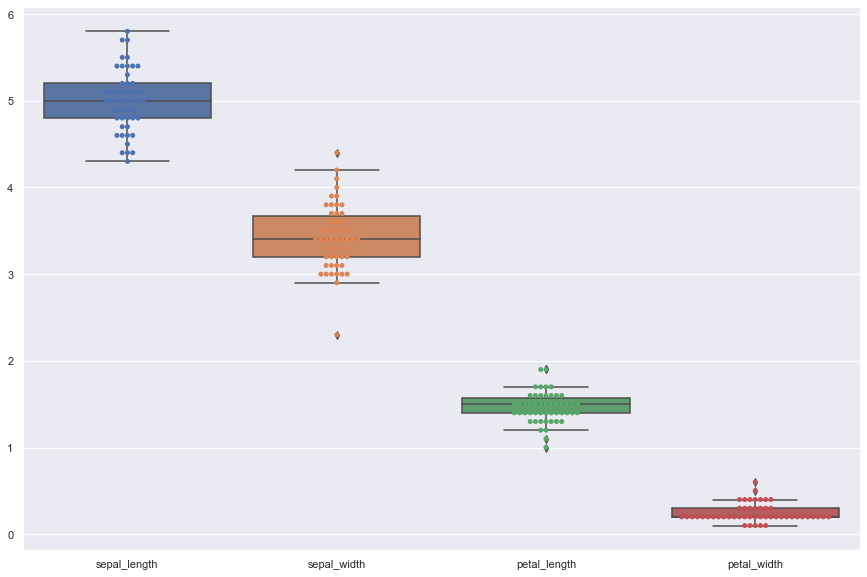

In [6]:
sns.set()
plt.figure(figsize=(15,10))
sns.boxplot(data=iris_se)
sns.swarmplot(data=iris_se)

对于山鸢尾来说，它的四个特征的长度呈下降的趋势。

<AxesSubplot:>

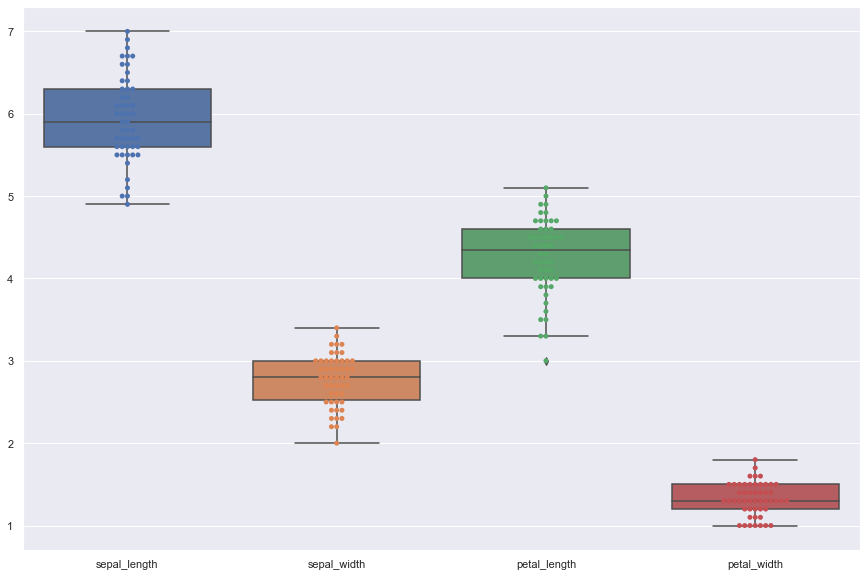

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data=iris_ver)
sns.swarmplot(data=iris_ver)

<AxesSubplot:>

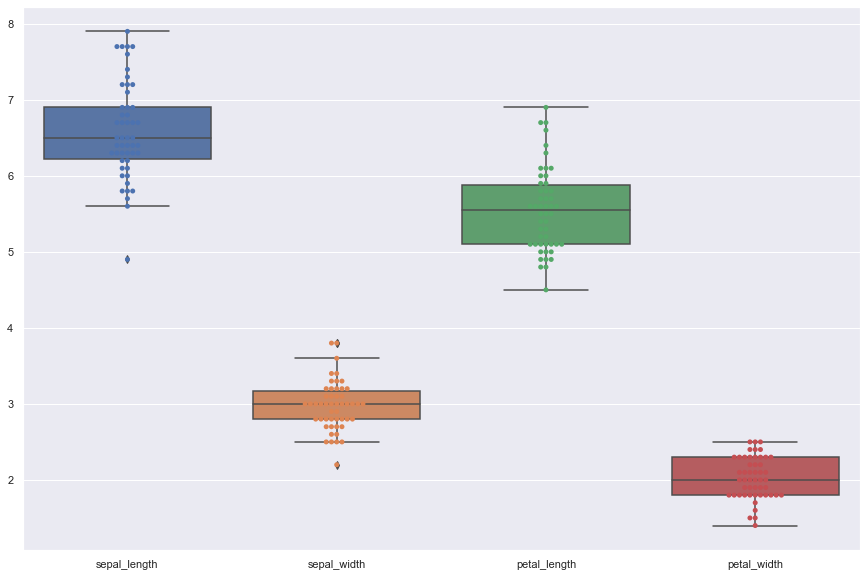

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=iris_vir)
sns.swarmplot(data=iris_vir)

对于杂色鸢尾和弗吉尼亚鸢尾来说，它们花萼和花瓣的长度都要比宽度要长。此外，这两种类型的分布也比较相似。

3. 使用散点图和回归图分析不同鸢尾花花瓣长度和宽度的关系

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

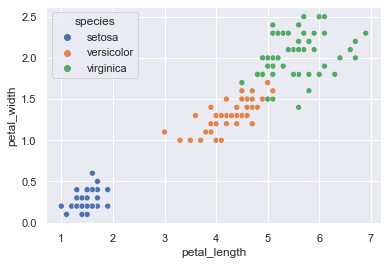

In [11]:
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species")

从散点图和回归图可知，花瓣的长度和宽度呈正相关。随着花瓣长度的增大，宽度也会增大。此外，我们可以从图中明显看出三种花的区别。

4. 分析不同鸢尾花之间的相关性/相似性

In [13]:
iris_se_corr = iris_se.corr()
iris_ver_corr = iris_ver.corr()
iris_vir_corr = iris_vir.corr()

<AxesSubplot:>

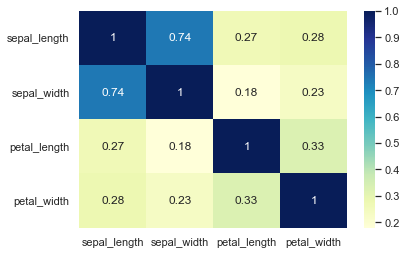

In [14]:
sns.heatmap(iris_se_corr,annot=True,cmap="YlGnBu")

对于山鸢尾来说，花萼的长度和宽度相关性最高。

<AxesSubplot:>

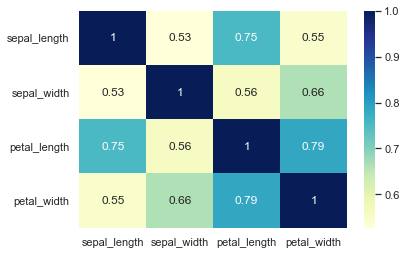

In [15]:
sns.heatmap(iris_ver_corr,annot=True,cmap="YlGnBu")

对于杂色鸢尾，花萼的长度和花瓣的长度相关性最高。

<AxesSubplot:>

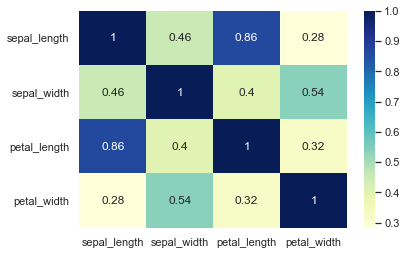

In [16]:
sns.heatmap(iris_vir_corr,annot=True,cmap="YlGnBu")

In [ ]:
同样的，对于弗吉尼亚鸢尾，花萼的长度和花瓣的长度相关性最高。